In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('combined_dataset.csv')
df = df.drop(columns='domain')
df

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,10000000,0,0,0,20,0,0,1,20,2,1
1,194914,0,1,7305,42,0,0,0,12,2,0
2,10000000,0,0,0,155,0,0,0,14,1,1
3,7001,0,0,0,35,0,0,0,18,3,0
4,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95905,5001,0,1,8035,28,0,0,0,16,2,0
95906,230251,0,1,8400,47,0,0,1,27,2,0
95907,10000000,0,0,0,43,0,0,0,29,3,1
95908,2008,0,1,9862,41,0,0,0,14,2,0


In [4]:
df.shape

(95910, 11)

In [10]:
df.iloc[2][0]

10000000

In [3]:
df = df.dropna()
df.shape

(95910, 11)

In [4]:
# df = df.drop_duplicates()
# df.shape

(41025, 11)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
points_train, points_test, labels_train, labels_test = train_test_split(df.iloc[:, :-1], df['label'], test_size=0.25, random_state=0)
print(points_train, points_test)

        ranking  isIp  valid  activeDuration  urlLen  is@  isredirect  \
4228       6618     0      0               0      74    0           0   
34168  10000000     0      0               0      46    0           0   
3847   10000000     0      1            8765      51    0           0   
5491         11     0      1            7305      32    0           0   
32014  10000000     0      0               0      61    0           0   
...         ...   ...    ...             ...     ...  ...         ...   
35112  10000000     0      1             366      42    0           0   
64805     14969     0      0               0      55    0           0   
59673  10000000     0      1            6575      33    0           0   
36232     64671     0      1           11321      20    0           0   
3272       4184     0      0               0      44    0           0   

       haveDash  domainLen  nosOfSubdomain  
4228          0         19               3  
34168         0         18       

In [7]:
print(points_train.shape, points_test.shape)

(30768, 10) (10257, 10)


In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt.fit(points_train, labels_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

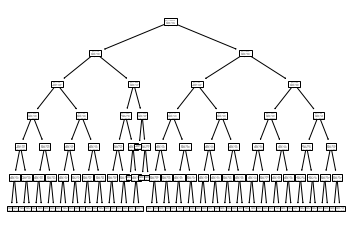

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure()
tree.plot_tree(dt)
plt.show()

In [10]:
prediction = dt.predict(points_test)
print(points_test.assign(predict=prediction))

        ranking  isIp  valid  activeDuration  urlLen  is@  isredirect  \
25301  10000000     0      1            3653      64    0           0   
2517       4918     0      1            7671      58    0           0   
21354    238256     0      1            8401      49    0           0   
10682  10000000     0      0               0     202    0           0   
20283  10000000     0      1            4748      60    0           0   
...         ...   ...    ...             ...     ...  ...         ...   
3223   10000000     0      1           10226      35    0           0   
60721    866477     0      1            9129      31    0           0   
45112      3275     0      0               0      24    0           0   
83628  10000000     0      0               0     248    0           0   
477          79     0      1            8400      31    0           0   

       haveDash  domainLen  nosOfSubdomain  predict  
25301         0         24               2        1  
2517          0

In [11]:
print(format(dt.score(points_test, labels_test)))

0.8922686945500634


In [12]:
# Математическое ожидание и среднеквадратическое отклонение для ranking
mean_ranking = np.mean(df['ranking'])
print(mean_ranking)
std_ranking = np.std(df['ranking'])
print(std_ranking)

6266916.772894576
4781309.444499745


In [13]:
# Отрицательный и положительный доверительные интервалы для ranking
otric_dover_int_ranking = mean_ranking - 3 * std_ranking
poloj_dover_int_ranking = mean_ranking + 3 * std_ranking
print(otric_dover_int_ranking, poloj_dover_int_ranking)

-8077011.560604658 20610845.10639381


In [14]:
# Математическое ожидание и среднеквадратическое отклонение для isIp
mean_isIp = np.mean(df['isIp'])
print(mean_isIp)
std_isIp = np.std(df['isIp'])
print(std_isIp)

0.0003168799512492383
0.017798301557894074


In [15]:
# Отрицательный и положительный доверительные интервалы для isIp
otric_dover_int_isIp = mean_isIp - 3 * std_isIp
poloj_dover_int_isIp = mean_isIp + 3 * std_isIp
print(otric_dover_int_isIp, poloj_dover_int_isIp)

-0.05307802472243298 0.05371178462493146


In [16]:
# Математическое ожидание и среднеквадратическое отклонение для valid
mean_valid = np.mean(df['valid'])
print(mean_valid)
std_valid = np.std(df['valid'])
print(std_valid)

0.6022912858013406
0.4894246549256673


In [17]:
# Отрицательный и положительный доверительные интервалы для valid
otric_dover_int_valid = mean_valid - 3 * std_valid
poloj_dover_int_valid = mean_valid + 3 * std_valid
print(otric_dover_int_valid, poloj_dover_int_valid)

-0.8659826789756612 2.0705652505783423


In [18]:
# Математическое ожидание и среднеквадратическое отклонение для activeDuration
mean_activeDuration = np.mean(df['activeDuration'])
print(mean_activeDuration)
std_activeDuration = np.std(df['activeDuration'])
print(std_activeDuration)

3726.9282632541135
3887.4449546882784


In [19]:
# Отрицательный и положительный доверительные интервалы для activeDuration
otric_dover_int_activeDuration = mean_activeDuration - 3 * std_activeDuration
poloj_dover_int_activeDuration = mean_activeDuration + 3 * std_activeDuration
print(otric_dover_int_activeDuration, poloj_dover_int_activeDuration)

-7935.406600810721 15389.263127318947


In [20]:
# Математическое ожидание и среднеквадратическое отклонение для urlLen
mean_urlLen = np.mean(df['urlLen'])
print(mean_urlLen)
std_urlLen = np.std(df['urlLen'])
print(std_urlLen)

64.31748933577087
57.15825848585602


In [21]:
# Отрицательный и положительный доверительные интервалы для urlLen
otric_dover_int_urlLen = mean_urlLen - 3 * std_urlLen
poloj_dover_int_urlLen = mean_urlLen + 3 * std_urlLen
print(otric_dover_int_urlLen, poloj_dover_int_urlLen)

-107.15728612179718 235.79226479333892


In [22]:
# Математическое ожидание и среднеквадратическое отклонение для is@
mean_issob = np.mean(df['is@'])
print(mean_issob)
std_issob = np.std(df['is@'])
print(std_issob)

0.004046313223644119
0.06348181293047864


In [23]:
# Отрицательный и положительный доверительные интервалы для issob
otric_dover_int_issob = mean_issob - 3 * std_issob
poloj_dover_int_issob = mean_issob + 3 * std_issob
print(otric_dover_int_issob, poloj_dover_int_issob)

-0.18639912556779178 0.19449175201508004


In [24]:
# Математическое ожидание и среднеквадратическое отклонение для isredirect
mean_isredirect = np.mean(df['isredirect'])
print(mean_isredirect)
std_isredirect = np.std(df['isredirect'])
print(std_isredirect)

0.012723948811700183
0.11208055111542513


In [25]:
# Отрицательный и положительный доверительные интервалы для isredirect
otric_dover_int_isredirect = mean_isredirect - 3 * std_isredirect
poloj_dover_int_isredirect = mean_isredirect + 3 * std_isredirect
print(otric_dover_int_isredirect, poloj_dover_int_isredirect)

-0.3235177045345752 0.34896560215797556


In [26]:
# Математическое ожидание и среднеквадратическое отклонение для haveDash
mean_haveDash = np.mean(df['haveDash'])
print(mean_haveDash)
std_haveDash = np.std(df['haveDash'])
print(std_haveDash)

0.15441803778184035
0.3613490105001623


In [27]:
# Отрицательный и положительный доверительные интервалы для haveDash
otric_dover_int_haveDash = mean_haveDash - 3 * std_haveDash
poloj_dover_int_haveDash = mean_haveDash + 3 * std_haveDash
print(otric_dover_int_haveDash, poloj_dover_int_haveDash)

-0.9296289937186467 1.2384650692823274


In [28]:
# Математическое ожидание и среднеквадратическое отклонение для domainLen
mean_domainLen = np.mean(df['domainLen'])
print(mean_domainLen)
std_domainLen = np.std(df['domainLen'])
print(std_domainLen)

23.437416209628275
25.59154604380289


In [29]:
# Отрицательный и положительный доверительные интервалы для domainLen
otric_dover_int_domainLen = mean_domainLen - 3 * std_domainLen
poloj_dover_int_domainLen = mean_domainLen + 3 * std_domainLen
print(otric_dover_int_domainLen, poloj_dover_int_domainLen)

-53.33722192178039 100.21205434103695


In [30]:
# Математическое ожидание и среднеквадратическое отклонение для nosOfSubdomain
mean_nosOfSubdomain = np.mean(df['nosOfSubdomain'])
print(mean_nosOfSubdomain)
std_nosOfSubdomain = np.std(df['nosOfSubdomain'])
print(std_nosOfSubdomain)

2.4286654478976235
2.129262699840127


In [31]:
# Отрицательный и положительный доверительные интервалы для nosOfSubdomain
otric_dover_int_nosOfSubdomain = mean_nosOfSubdomain - 3 * std_nosOfSubdomain
poloj_dover_int_nosOfSubdomain = mean_nosOfSubdomain + 3 * std_nosOfSubdomain
print(otric_dover_int_nosOfSubdomain, poloj_dover_int_nosOfSubdomain)

-3.9591226516227573 8.816453547418003


In [32]:
predict_s_proverkoi = []
def proverka_na_dov_intervals():
    anomalyclass = 2
    for i in points_new.index:
        elem = prediction_new[i]
        if (points_new.iloc[i][0] < otric_dover_int_ranking or points_new.iloc[i][0] > poloj_dover_int_ranking) or (points_new.iloc[i][1] < otric_dover_int_isIp or points_new.iloc[i][1] > poloj_dover_int_isIp) or (points_new.iloc[i][2] < otric_dover_int_valid or points_new.iloc[i][2] > poloj_dover_int_valid) or (points_new.iloc[i][3] < otric_dover_int_activeDuration or points_new.iloc[i][3] > poloj_dover_int_activeDuration) or (points_new.iloc[i][4] < otric_dover_int_urlLen or points_new.iloc[i][4] > poloj_dover_int_urlLen) or (points_new.iloc[i][5] < otric_dover_int_issob or points_new.iloc[i][5] > poloj_dover_int_issob) or (points_new.iloc[i][6] < otric_dover_int_isredirect or points_new.iloc[i][6] > poloj_dover_int_isredirect) or (points_new.iloc[i][7] < otric_dover_int_haveDash or points_new.iloc[i][7] > poloj_dover_int_haveDash) or (points_new.iloc[i][8] < otric_dover_int_domainLen or points_new.iloc[i][8] > poloj_dover_int_domainLen) or (points_new.iloc[i][9] < otric_dover_int_nosOfSubdomain or points_new.iloc[i][9] > poloj_dover_int_nosOfSubdomain): 
            predict_s_proverkoi.append(anomalyclass)
        else:
            predict_s_proverkoi.append(int(elem))
    print(predict_s_proverkoi)
    print(len(predict_s_proverkoi))

In [33]:
points_new = pd.DataFrame({'ranking': [0, 200, 170, 10000000],
                           'isIp': [0, 0, 1, 0],
                           'valid': [1, 0, 1, 0],
                           'activeDuration': [0, 1, 0, 0],
                           'urlLen':[0, 10, 22, 20],
                           'is@':[1, 1, 0, 0],
                           'isredirect':[1, 0, 1, 0],
                           'haveDash':[0, 0, 1, 1],
                           'domainLen':[190, 10, 500, 20],
                           'nosOfSubdomain':[1, 3, 2, 2],
                           })

In [34]:
prediction_new = dt.predict(points_new)

In [35]:
print(proverka_na_dov_intervals())

[2, 2, 2, 1]
4
None


In [36]:
points_new.assign(label=predict_s_proverkoi)

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,0,0,1,0,0,1,1,0,190,1,2
1,200,0,0,1,10,1,0,0,10,3,2
2,170,1,1,0,22,0,1,1,500,2,2
3,10000000,0,0,0,20,0,0,1,20,2,1
